In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from mplsetup import rcsetup
rcsetup()

In [179]:
import sys
sys.path.insert(0, '../../more-is-better')
from exptdetails import ExptDetails

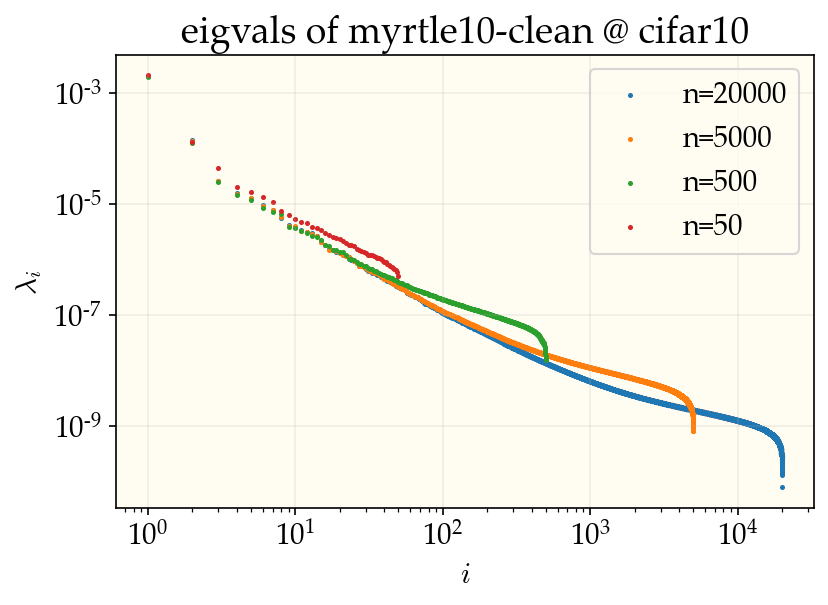

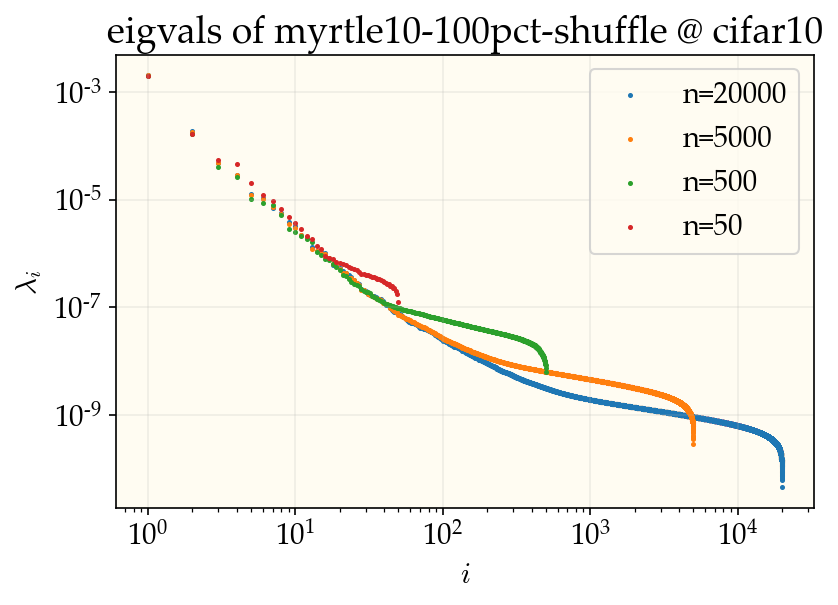

In [181]:
expts = [
    (0, 10),
    (22, 10)
]

def thingy(x, alpha, c):
    L = len(x)
    powerlaw = x**-alpha + L**(-alpha)/(alpha-1)
    return c * powerlaw
def thingy2(x, alpha, c):
    powerlaw = x**-alpha
    return c * powerlaw

expt_details = [ExptDetails(*info, "cifar10") for info in expts]
for expt in expt_details:
    work_dir = f"../results/{expt.expt_name}"
    with open(f"{work_dir}/eigdata.file", 'rb') as handle:
        eigdata = pickle.load(handle)
    for n in [50, 500, 5000, 20000][::-1]:
        eigvals = eigdata[n]["eigvals"]
        idxs = 1 + np.arange(len(eigvals))
        # plt.plot(idxs, thingy(idxs, 1.3, 0.02))
        plt.scatter(idxs, eigvals, s=2, label=f"n={n}")
    plt.title(f'eigvals of {expt.expt_name} @ cifar10')
    plt.legend()
    plt.grid(alpha=0.2)
    plt.xlabel('$i$')
    plt.ylabel('$\lambda_i$')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

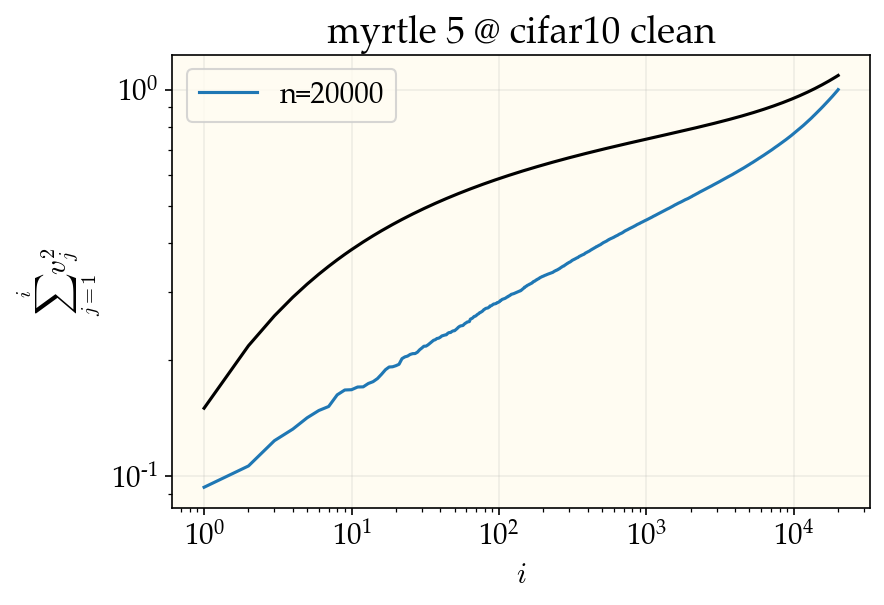

In [164]:
b_guesses = [1.03, 1.055, 1.056, 1.15]
for i, n in enumerate([50, 500, 5000, 20000]):
    if n < 20000:
        continue
    eigcoeffs_full = eigdata[n]["eigcoeffs"]
    eigcoeffs = np.linalg.norm(eigcoeffs_full, axis=-1)**2
    idxs = 1 + np.arange(len(eigcoeffs))
    fullsum = np.cumsum(eigcoeffs)
    plt.plot(idxs, fullsum, label=f"n={n}")
    b_guess = b_guesses[i]
    plt.plot(idxs, np.cumsum(thingy(idxs, b_guess, .15)), color='k')
plt.title('myrtle 5 @ cifar10 clean')
plt.ylabel('$\sum_{j=1}^i v_j^2$')
plt.xlabel('$i$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

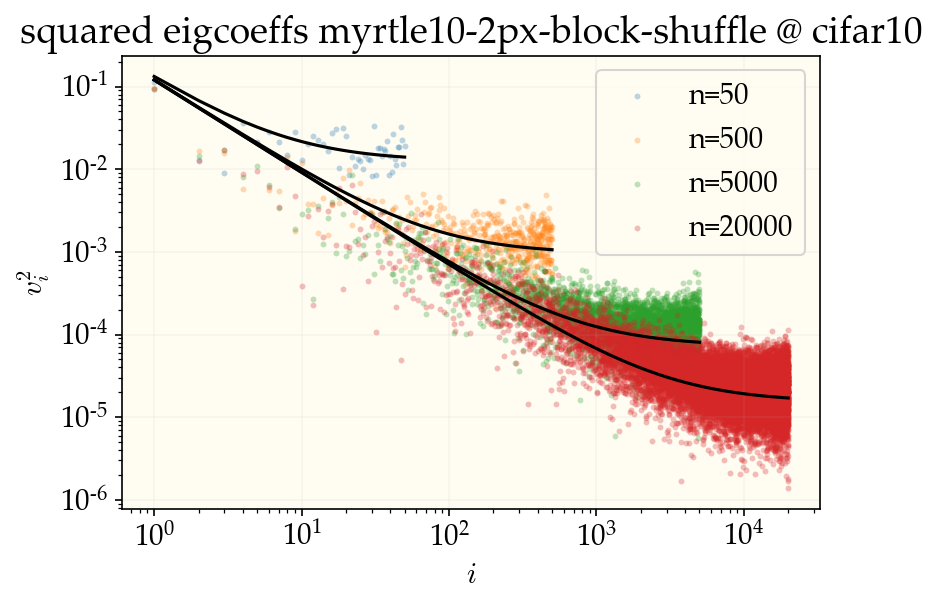

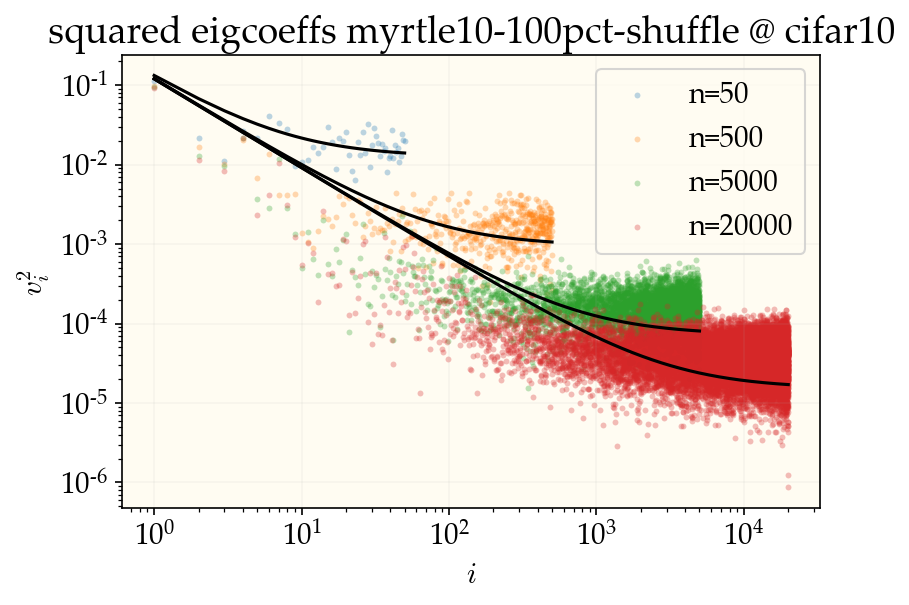

In [177]:
expt_details = [ExptDetails(*info, "cifar10") for info in expts]
for expt in expt_details:
    work_dir = f"eigdata/{expt.expt_name}"
    with open(f"{work_dir}/eigdata.file", 'rb') as handle:
        eigdata = pickle.load(handle)
    for n in [50, 500, 5000, 20000]:
        eigcoeffs_full = eigdata[n]["eigcoeffs"]
        eigcoeffs = np.linalg.norm(eigcoeffs_full, axis=-1)**2
        # eigcoeffs = sorted(eigcoeffs, reverse=True)
        idxs = 1 + np.arange(len(eigcoeffs))
        plt.scatter(idxs, eigcoeffs, s=8, lw=0, alpha=.3, label=f"n={n}")
        plt.plot(idxs, thingy(idxs, 1.12, 0.12), color='k')
    plt.title(f'squared eigcoeffs {expt.expt_name} @ cifar10')
    plt.ylabel('$v_i^2$')
    plt.xlabel('$i$')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.grid(alpha=0.1)
    plt.show()

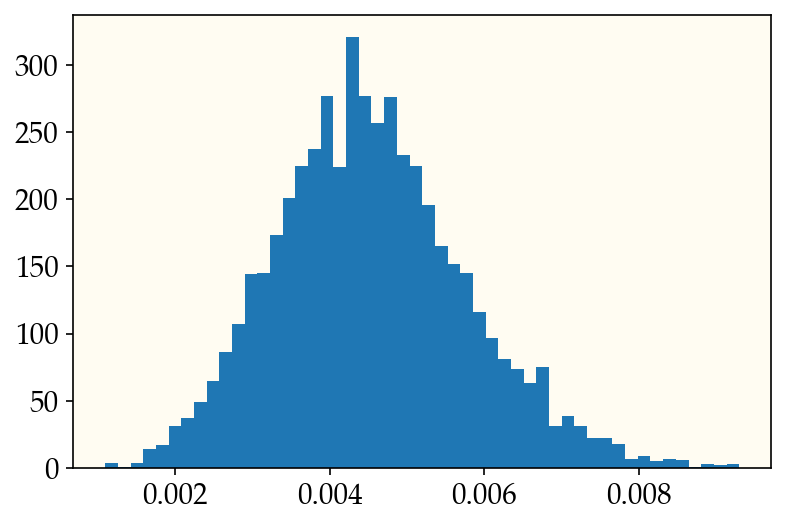

In [139]:
plt.hist(eigcoeffs[-5000:], bins=50)
plt.show()